<a href="https://colab.research.google.com/github/idrkhowto/Stellar-Mass-Estimates-SDSS_DR12/blob/main/SDSS12_Stellar_Mass_Estimates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astropy

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install astroquery

#Import packages
from astropy.io import fits
from astropy import units
from astropy.table import Table
import numpy as np, pandas as pd

#Astroquery is what we use to download data from SDSS
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy import constants as const

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

import pickle
pickle.HIGHEST_PROTOCOL = 4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 5.0 MB/s 
     |████████████████████████████████| 832 kB 54.7 MB/s 
     |████████████████████████████████| 48 kB 4.6 MB/s 
     |████████████████████████████████| 4.1 MB 41.7 MB/s 


In [7]:
#Load stellar mass estimate data from SDSS12

#To Pandas
#StellarMassDust_data = Table(fits.open('granada_fsps_krou_wideform_dust-v5_7_2.fits')[1].data)

with fits.open('granada_fsps_krou_wideform_dust-DR12.fits') as hdu:
#with fits.open('granada_fsps_krou_wideform_dust-v5_7_2.fits') as hdu:

    hdu.info()
    StellarMassDust_data = Table(hdu[1].data)

#with fits.open('granada_fsps_krou_wideform_nodust-v5_7_2.fits') as hdu:
    #StellarMassNoDust_data = Table(hdu[1].data)
 
StellarMassDust_data.field('LOGMASS')

#StellarMassDust_data.field(17)
#StellarMassDust_data.colnames

Filename: granada_fsps_krou_wideform_dust-DR12.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    141   1489670R x 51C   [J, J, J, D, D, E, E, I, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, 5D, D, D, D, D, D, D, D, J, 5D, 5D, 5D, 5D, 5D, D, D, D, D, D, D, D, D, J, J, J, K, K, K, K, K, K, K, 6A, 6A, B]   


TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8

plt.rc('xtick',labelsize=22)
plt.rc('ytick',labelsize=22)

Text(0, 0.5, 'Stellar Mass - No Dust, dex')

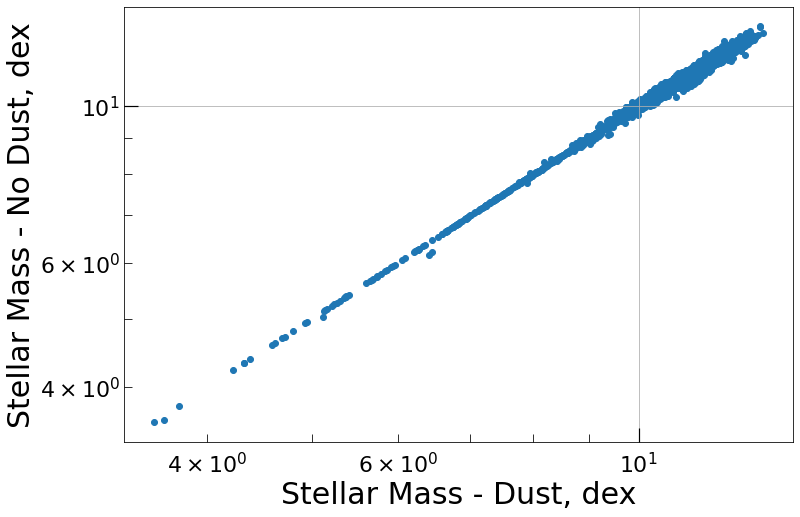

In [ ]:
plt.figure(figsize=(12,8))
plt.grid()
plt.xscale('log')
plt.yscale('log')

#Mask = (StellarMassDust_data.field(17) > 0) & (StellarMassDust_data.field(17) < 100) & (StellarMassNoDust_data.field(17) > 0) & (StellarMassNoDust_data.field(17).logMass < 100))

plt.scatter(StellarMassDust_data.field(17), StellarMassNoDust_data.field(17))

plt.xlabel('Stellar Mass - Dust, dex', size = 30)
plt.ylabel('Stellar Mass - No Dust, dex', size = 30)


#mean, st dev